In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Nvidia_stock_data.csv')

In [ ]:
print(df.head())

         Date     Close      High       Low      Open      Volume
0  1999-01-22  0.037612  0.044775  0.035581  0.040119  2714688000
1  1999-01-25  0.041552  0.042029  0.037612  0.040597   510480000
2  1999-01-26  0.038328  0.042865  0.037731  0.042029   343200000
3  1999-01-27  0.038209  0.039403  0.036298  0.038447   244368000
4  1999-01-28  0.038089  0.038447  0.037850  0.038209   227520000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6637 entries, 0 to 6636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6637 non-null   object 
 1   Close   6637 non-null   float64
 2   High    6637 non-null   float64
 3   Low     6637 non-null   float64
 4   Open    6637 non-null   float64
 5   Volume  6637 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 311.2+ KB
None


In [ ]:
df = df.drop(columns=['Date'])  # Drop non-numeric or irrelevant columns

In [ ]:
df['Price_Range'] = df['High'] - df['Low']
df['Daily_Change'] = df['Close'] - df['Open']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

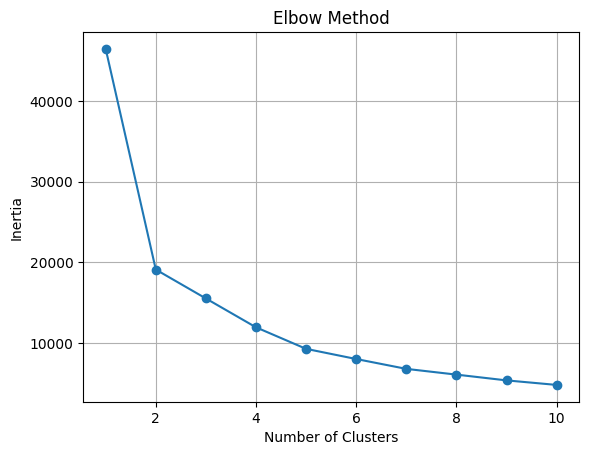

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [32]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


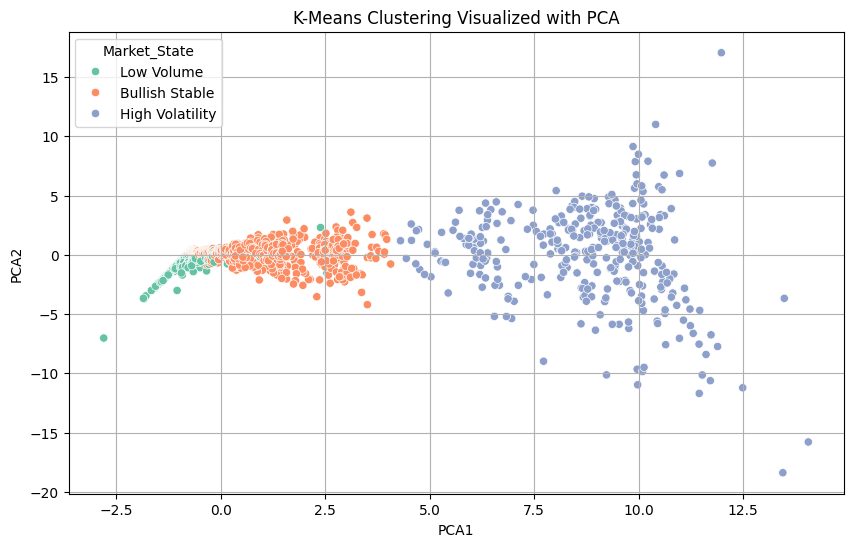

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Market_State', palette='Set2')
plt.title('K-Means Clustering Visualized with PCA')
plt.grid(True)
plt.show()

In [ ]:
summary = df.groupby('Cluster').mean()
print(summary[['Close', 'Volume', 'Price_Range', 'Daily_Change']])

              Close        Volume  Price_Range  Daily_Change
Cluster                                                     
0          5.082148  4.664984e+08     0.181611      0.003400
1        116.071152  3.392469e+08     4.727302     -0.067926
2          0.784762  1.325425e+09     0.051062      0.001823


In [ ]:
print(df['Cluster'].value_counts())

Cluster
0    5252
2    1045
1     340
Name: count, dtype: int64


In [ ]:
df['Date'] = pd.read_csv('Nvidia_stock_data.csv')['Date']
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

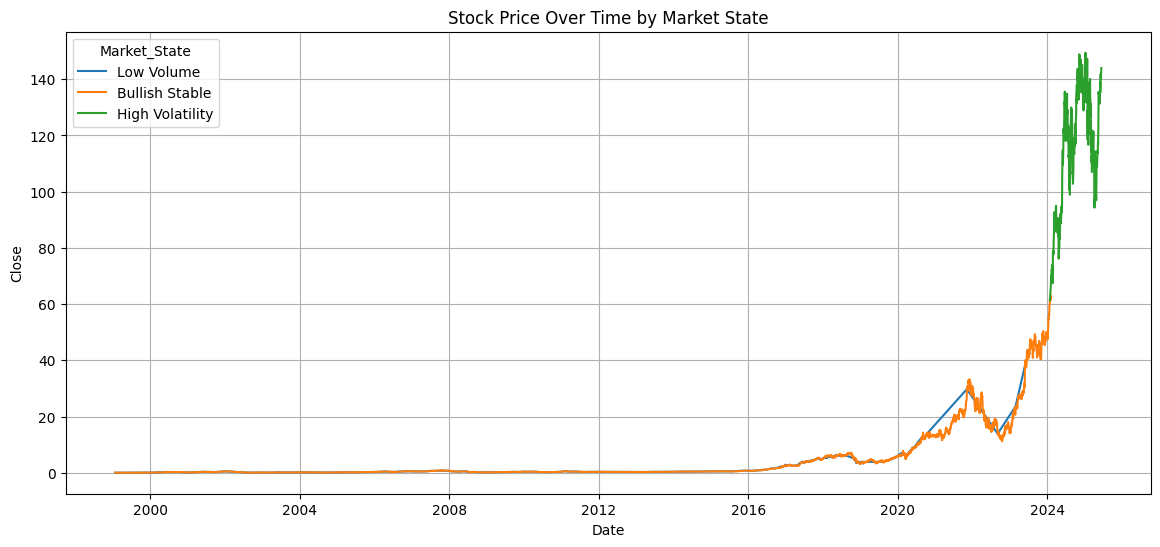

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Close', hue='Market_State', palette='tab10')
plt.title("Stock Price Over Time by Market State")
plt.grid(True)
plt.show()

In [ ]:
df['Market_State'] = df.apply(label_cluster, axis=1)
print(df[['Date', 'Close', 'Cluster', 'Market_State']].head(5))

        Date     Close  Cluster    Market_State
0 1999-01-22  0.037612        2      Low Volume
1 1999-01-25  0.041552        0  Bullish Stable
2 1999-01-26  0.038328        0  Bullish Stable
3 1999-01-27  0.038209        0  Bullish Stable
4 1999-01-28  0.038089        0  Bullish Stable


In [ ]:
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Bullish Stable'
    elif row['Cluster'] == 1:
        return 'High Volatility'
    elif row['Cluster'] == 2:
        return 'Low Volume'
    else:
        return 'Other'

In [ ]:
print(df['Cluster'].unique())

[2 0 1]


In [ ]:
df.to_csv('nvidia_clustered.csv', index=False)